In [79]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # pylint: disable=import-error, no-name-in-module
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex
import numpy as np
from qiskit import assemble
from math import pi
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt
import numpy as np
import math
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction

In [54]:
## We need this for "noisy simulation"
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

In [55]:
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.providers.fake_provider import GenericBackendV2

device = GenericBackendV2(3,seed=54)
noise_model = NoiseModel.from_backend(device)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'delay', 'id', 'measure', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['id', 'cx', 'sx', 'x', 'measure']
  Qubits with noise: [0, 1, 2]
  Specific qubit errors: [('cx', (0, 1)), ('cx', (1, 0)), ('cx', (0, 2)), ('cx', (2, 0)), ('cx', (1, 2)), ('cx', (2, 1)), ('id', (0,)), ('id', (1,)), ('id', (2,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,))]


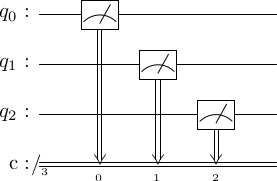

In [56]:
qc0 = QuantumCircuit(3,3,name='0') # initialize circuit with three qubits in the 0 state

qc0.measure(qc0.qregs[0],qc0.cregs[0]) # measure the qubits

qc0.draw(output="latex")

In [57]:
noise_model = NoiseModel.from_backend(device)
job = device.run(qc0)
result = job.result()
counts = result.get_counts()
print(result.get_counts())

{'001': 1, '100': 7, '000': 1016}


In [58]:
# ...almost all results still come out '000',...
assert counts['000'] > sum(counts.values())*0.95

In [8]:
qc1 = QuantumCircuit(3, 3, name='0') # initialize circuit with three qubits in the 0 state
qc1.x(qc1.qregs[0]) # flip each 0 to 1

qc1.measure(qc1.qregs[0],qc1.cregs[0]) # measure the qubits

# run the circuit with th noise model and extract the counts
#counts = execute(qc1, Aer.get_backend('qasm_simulator'),noise_model=noise_model).result().get_counts()
job = device.run(qc1)
result = job.result()
counts = result.get_counts()
print(counts)

{'110': 1, '101': 4, '011': 4, '111': 1015}


In [9]:
# ...number of samples that come out with a majority in the wrong state
# (0 in this case) is again much less than 10,...
assert counts.get('000', 0) < 10

In [61]:
p1 = 8/1024
p3 = 3 * p1**2 * (1-p1) + p1**3 # probability of 2 or 3 errors
print('Probability of a single reply being garbled: {}'.format(p1))
print('Probability of a the majority of three replies being garbled: {:.4f}'.format(p3))

Probability of a single reply being garbled: 0.0078125
Probability of a the majority of three replies being garbled: 0.0002


In [62]:
p1 = 8/15
p3 = 3 * p1**2 * (1-p1) + p1**3 # probability of 2 or 3 errors
print('Probability of a single reply being garbled: {}'.format(p1))
print('Probability of a the majority of three replies being garbled: {:.4f}'.format(p3))

Probability of a single reply being garbled: 0.08
Probability of a the majority of three replies being garbled: 0.0182


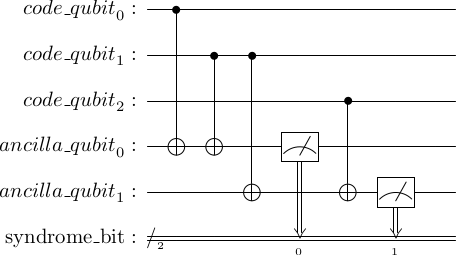

In [67]:
from qiskit import QuantumRegister, ClassicalRegister

cq = QuantumRegister(3, 'code_qubit')
lq = QuantumRegister(2, 'ancilla_qubit')
sb = ClassicalRegister(2, 'syndrome_bit')
qc = QuantumCircuit(cq, lq, sb)
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.cx(cq[1], lq[1])
qc.cx(cq[2], lq[1])
qc.measure(lq[0], sb[0])
qc.measure(lq[1], sb[1])
qc.draw(output="latex")

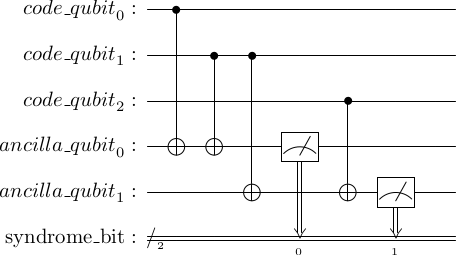

In [65]:
qc_init = QuantumCircuit(cq, lq, sb)
qc_init.compose(qc).draw(output="latex")

In [12]:
#job = device.run(qc_init.compose(qc))
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc_init.compose(qc)).result()
#result = job.result()
counts = result.get_counts()
print(result.get_counts())

{'00': 1024}


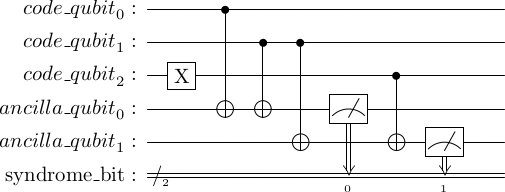

In [13]:
qc_init = QuantumCircuit(cq, lq, sb)
qc_init.x(cq[2])
display(qc_init.compose(qc).draw(output="latex"))

In [14]:
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc_init.compose(qc)).result()
counts = result.get_counts()
print(result.get_counts())

{'10': 1024}


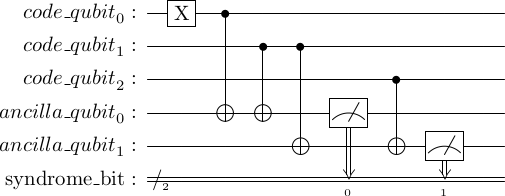

In [15]:
qc_init = QuantumCircuit(cq, lq, sb)
qc_init.x(cq[0])
display(qc_init.compose(qc).draw(output="latex"))

In [16]:
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc_init.compose(qc)).result()
counts = result.get_counts()
print(result.get_counts())

{'01': 1024}


In [69]:
device = GenericBackendV2(3,seed=54)
job = device.run(qc)
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 1024}


## What if we have a phase flip?

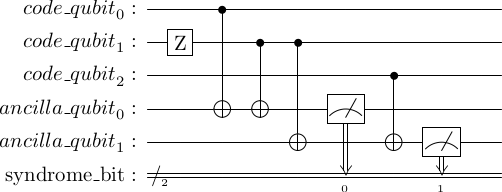

In [17]:
qc_init = QuantumCircuit(cq, lq, sb)
qc_init.z(cq[1])
qc_init.compose(qc).draw(output="latex")

In [18]:
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc_init.compose(qc)).result()
counts = result.get_counts()
print(result.get_counts())

{'00': 1024}


It doesn't work for phase flip!

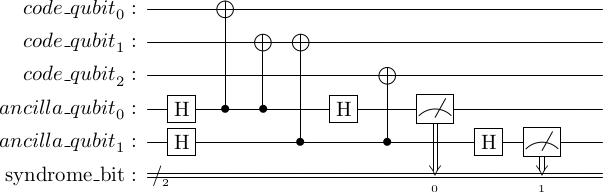

In [72]:
from qiskit import QuantumRegister, ClassicalRegister

cq = QuantumRegister(3, 'code_qubit')
lq = QuantumRegister(2, 'ancilla_qubit')
sb = ClassicalRegister(2, 'syndrome_bit')
qc = QuantumCircuit(cq, lq, sb)
qc.h(lq[0])
qc.h(lq[1])
qc.cx(lq[0],cq[0])
qc.cx(lq[0],cq[1])
qc.cx(lq[1],cq[1])
qc.cx(lq[1],cq[2])
qc.h(lq[0])
qc.h(lq[1])
qc.measure(lq[0], sb[0])
qc.measure(lq[1], sb[1])
qc.draw(output="latex")

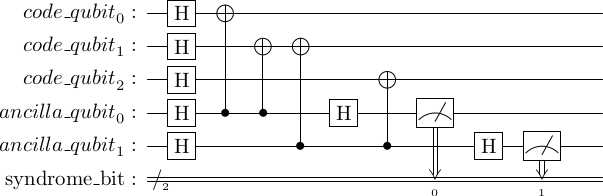

In [73]:
qc_init = QuantumCircuit(cq, lq, sb)
qc_init.h(cq)
qc_init.compose(qc).draw(output="latex")

In [74]:
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc_init.compose(qc)).result()
counts = result.get_counts()
print(result.get_counts())

{'00': 1024}


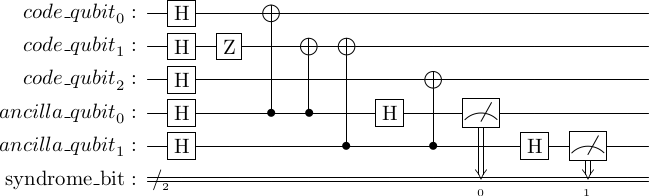

In [75]:
qc_init = QuantumCircuit(cq, lq, sb)
qc_init.h(cq)
qc_init.z(cq[1])

qc_init.compose(qc).draw(output="latex")

In [76]:
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc_init.compose(qc)).result()
counts = result.get_counts()
print(result.get_counts())

{'11': 1024}


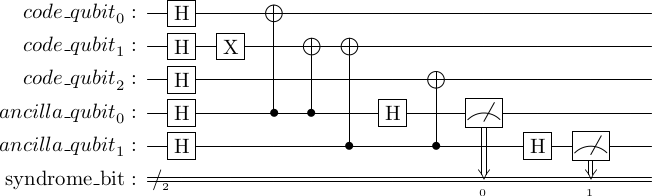

In [77]:
## Bit flip?

qc_init = QuantumCircuit(cq, lq, sb)
qc_init.h(cq)
qc_init.x(cq[1])

qc_init.compose(qc).draw(output="latex")

In [78]:
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc_init.compose(qc)).result()
counts = result.get_counts()
print(result.get_counts())

{'00': 1024}


It doesn't work for bit flip!

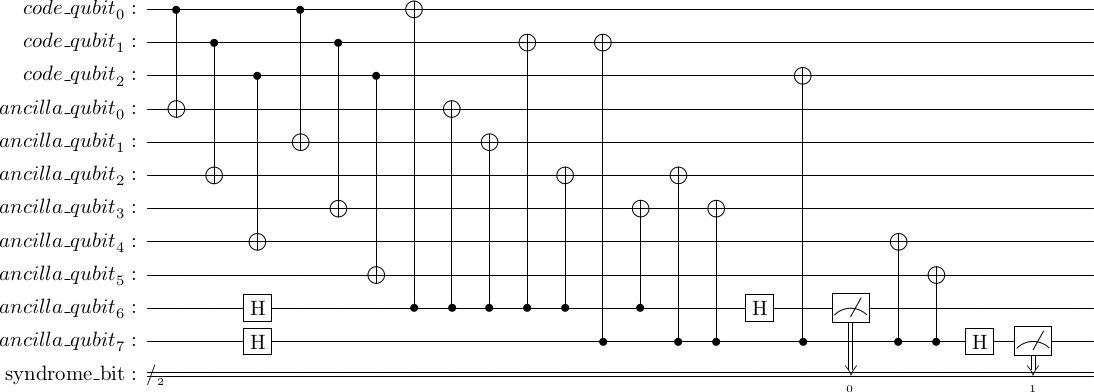

In [26]:
from qiskit import QuantumRegister, ClassicalRegister

cq = QuantumRegister(3, 'code_qubit')
lq = QuantumRegister(8, 'ancilla_qubit')
sb = ClassicalRegister(2, 'syndrome_bit')
qc = QuantumCircuit(cq, lq, sb)
qc.cx(cq[0], lq[0])
qc.cx(cq[0], lq[1])
qc.cx(cq[1], lq[2])
qc.cx(cq[1], lq[3])
qc.cx(cq[2], lq[4])
qc.cx(cq[2], lq[5])
qc.h(lq[6])
qc.h(lq[7])
qc.cx(lq[6],cq[0])
qc.cx(lq[6],lq[0])
qc.cx(lq[6],lq[1])
qc.cx(lq[6],cq[1])
qc.cx(lq[6],lq[2])
qc.cx(lq[6],lq[3])
qc.cx(lq[7],cq[1])
qc.cx(lq[7],lq[2])
qc.cx(lq[7],lq[3])
qc.cx(lq[7],cq[2])
qc.cx(lq[7],lq[4])
qc.cx(lq[7],lq[5])
qc.h(lq[6])
qc.h(lq[7])
qc.measure(lq[6], sb[0])
qc.measure(lq[7], sb[1])
qc.draw(output="latex")

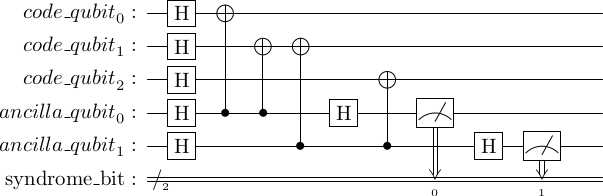

In [80]:
qc_init = QuantumCircuit(cq, lq, sb)
qc_init.h(cq)

qc_init.compose(qc).draw(output="latex")

In [81]:
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc_init.compose(qc)).result()
counts = result.get_counts()
print(result.get_counts())

{'00': 1024}


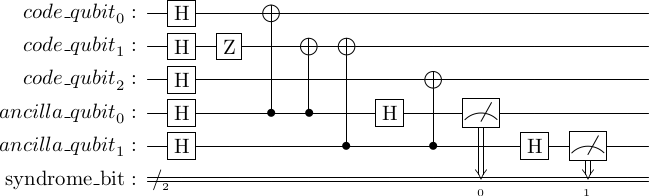

In [82]:
qc_init = QuantumCircuit(cq, lq, sb)
qc_init.h(cq)
qc_init.z(cq[1])

qc_init.compose(qc).draw(output="latex")

In [83]:
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc_init.compose(qc)).result()
counts = result.get_counts()
print(result.get_counts())

{'11': 1024}


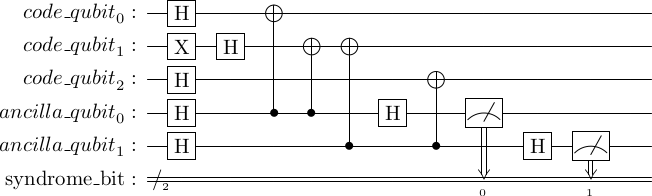

In [84]:
qc_init = QuantumCircuit(cq, lq, sb)
qc_init.x(cq[1])
qc_init.h(cq)

qc_init.compose(qc).draw(output="latex")

In [38]:
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc_init.compose(qc)).result()
counts = result.get_counts()
print(result.get_counts())

{'11': 1024}


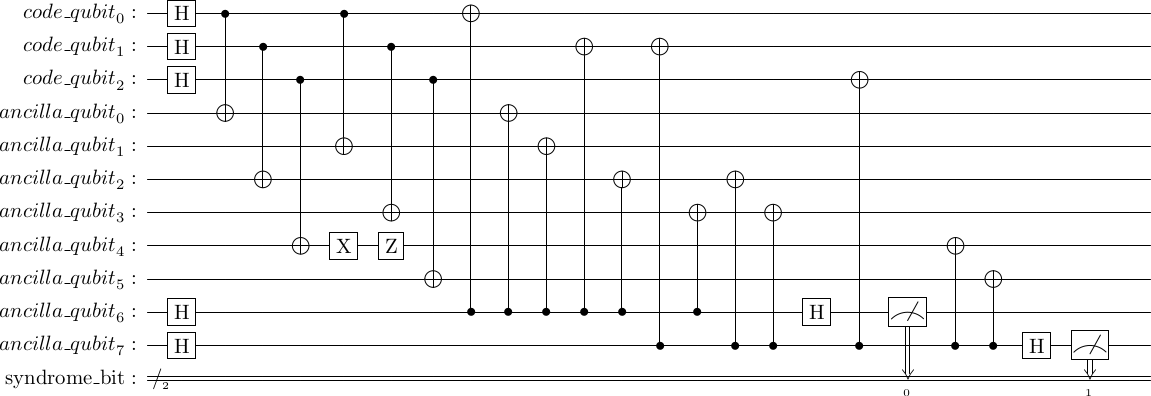

In [85]:
from qiskit import QuantumRegister, ClassicalRegister

cq = QuantumRegister(3, 'code_qubit')
lq = QuantumRegister(8, 'ancilla_qubit')
sb = ClassicalRegister(2, 'syndrome_bit')
qc = QuantumCircuit(cq, lq, sb)
qc.h(cq)
qc.cx(cq[0], lq[0])
qc.cx(cq[0], lq[1])
qc.cx(cq[1], lq[2])
qc.cx(cq[1], lq[3])
qc.cx(cq[2], lq[4])
qc.cx(cq[2], lq[5])
qc.h(lq[6])
qc.h(lq[7])
qc.x(lq[4])
qc.z(lq[4])
qc.cx(lq[6],cq[0])
qc.cx(lq[6],lq[0])
qc.cx(lq[6],lq[1])
qc.cx(lq[6],cq[1])
qc.cx(lq[6],lq[2])
qc.cx(lq[6],lq[3])
qc.cx(lq[7],cq[1])
qc.cx(lq[7],lq[2])
qc.cx(lq[7],lq[3])
qc.cx(lq[7],cq[2])
qc.cx(lq[7],lq[4])
qc.cx(lq[7],lq[5])
qc.h(lq[6])
qc.h(lq[7])
qc.measure(lq[6], sb[0])
qc.measure(lq[7], sb[1])
qc.draw(output="latex")

In [86]:
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(qc).result()
counts = result.get_counts()
print(result.get_counts())

{'10': 1024}


In [51]:
p1 = 0.01
p3 = 1-((1-p1) ** 9 + 9*p1 *(1-p1)**8 )
print('Probability of a single reply being garbled: {}'.format(p1))
print('Probability of a the majority of three replies being garbled: {:.4f}'.format(p3))

Probability of a single reply being garbled: 0.01
Probability of a the majority of three replies being garbled: 0.0034


In [52]:
p1 = 0.1
p3 = 1-((1-p1) ** 9 + 9*p1 *(1-p1)**8 )
print('Probability of a single reply being garbled: {}'.format(p1))
print('Probability of a the majority of three replies being garbled: {:.4f}'.format(p3))

Probability of a single reply being garbled: 0.1
Probability of a the majority of three replies being garbled: 0.2252
